author: ilian

# Пометки для Насти:)
Все комменты на русском для тебя. Все на англ - для финальной версии.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

 # Part I

1. Create a matrix of random values of a distribution of your choice.

In [ ]:
np.asmatrix(np.random.random((2,2)) * 10)

2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [ ]:
np.array(range(12)).reshape(4, 3)

3. Write a function that creates an incremental array of dimension (1,n) with values
between 0 and 1. Use arr.shape to verify

In [ ]:
def create_arr(n):
    return np.random.random((1,n))

In [ ]:
test = create_arr(3)
print(test)
print(test.shape)

4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [ ]:
arr = np.array(np.random.random((10, 12))*100)
print(arr)
arr[:4, 8:]

5. Using the function in Q3, get m vectors and bind them together (to have a m x n)
matrix. Plot the matrix with matplotlib’s imshow

In [ ]:
m = 4
n = 20
arr = []
for i in range(m):
    arr.append(create_arr(n)[0])
arr = np.asmatrix(arr)
plt.imshow(arr)

6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.
Plot the resulting matrix.

In [ ]:
mem = plt.imread('./mem.png')
plt.imshow(mem)

In [ ]:
print(mem.shape)
print(mem)

In [ ]:
mem = np.reshape(mem, (mem.shape[0]*mem.shape[1], mem.shape[2]))
mem * arr

# Part II

# AMARO

Пример как менять цвет. Нужно применить разные правила для центра и краев фото, вычислив радиус

Just try to add brightness

In [ ]:
brightness = [[1.2, 1.2, 1.2]]

In [ ]:
filteredVector = brightness * vector
brightPhoto = np.reshape(filteredVector, (shapeOriginal[0], shapeOriginal[1], shapeOriginal[2]))
plt.imshow(brightPhoto)

In [ ]:
brightness = [[0.8, 0.8, 0.8]]

In [ ]:
filteredVector = brightness * vector
darkPhoto = np.reshape(filteredVector, (shapeOriginal[0], shapeOriginal[1], shapeOriginal[2]))
plt.imshow(darkPhoto)

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(brightPhoto)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(darkPhoto)
plt.axis('off')
plt.show()

# RISE

Выдает не верный оттенок

In [ ]:
def rise(vector):
    red_coef = np.array([0.393, 0.769, 0.189])
    green_coef = np.array([0.349, 0.686, 0.168])
    blue_coef = np.array([0.272, 0.534, 0.131])
    filteredVector = np.copy(vector)
    for i in range(vector.shape[0]):
        red = min(1, max(0, np.sum(filteredVector[i] * red_coef)))
        green = min(1, max(0, np.sum(filteredVector[i] * green_coef)))
        blue = min(1, max(0, np.sum(filteredVector[i] * blue_coef)))
        filteredVector[i] = np.array([red, green, blue])
    return filteredVector

Попытка номер два по статье http://www.niwa.nu/2013/05/math-behind-colorspace-conversions-rgb-hsl/
Нужно бы переделать по статье http://beesbuzz.biz/code/16-hsv-color-transforms
Задача: сдвинуть цвет по Hue
Статус: Пока не завершено

In [12]:
def rise1(vector):
    filteredVector = np.array(vector.shape[0])
    for i in range(vector.shape[0]):
        #print(vector[i])
        maxRGB = max(vector[i])
        minRGB = min(vector[i])
        R = vector[i][0]
        G = vector[i][1]
        B = vector[i][2]
        Luminance = (minRGB + maxRGB) / 2
        #print(Luminance)
        if (Luminance == 0):
            Saturation = 0
            Hue = 0
        else:
            if (Luminance < 0.5):
                Saturation = (maxRGB-minRGB)/(maxRGB+minRGB)
            else: 
                Saturation = (maxRGB-minRGB)/(2.0-maxRGB-minRGB)
            if (R == maxRGB):
                Hue = (G-B)/(maxRGB-minRGB)
            elif (G == maxRGB):
                Hue = 2.0 + (B-R)/(maxRGB-minRGB)
            elif (B == maxRGB):
                Hue = 4.0 + (R-G)/(maxRGB-minRGB)
        #print(Saturation)
        if (Hue > 5):
            print(vector[i])
            print(maxRGB, minRGB)
            print(R,G)
        Hue *= 60
        if (Hue < 0):
            Hue += 360
        Hue = round(Hue)
        print(Luminance, Saturation, Hue)
        np.append(filteredVector, Hue)
    return filteredVector

0.479 0.605427974947808 109.0
0.2585 0.3500967117988394 39.0
0.403 0.3250620347394541 179.0


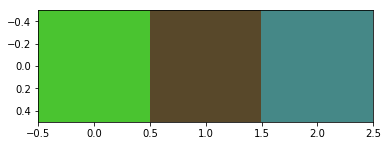

In [13]:
vector = np.array([[0.293, 0.769, 0.189], [0.349, 0.286, 0.168], [0.272, 0.534, 0.531]])
#print(vector.shape)
v = rise1(vector)
vector = np.array([[[0.293, 0.769, 0.189], [0.349, 0.286, 0.168], [0.272, 0.534, 0.531]]])
plt.imshow(vector)

# INKWELL

In [ ]:
def inkwell(vector):
    # Count average of brightness allover image
    coef = [0.299, 0.587, 0.114]
    avg = np.average(vector * coef)
    contrast = 2
    # Increase contrast - raise the difference between channel and average (grayscale)
    filteredVector = avg + contrast * (vector - avg)
    filteredVector = np.minimum(np.ones(vector.shape), np.maximum(np.zeros((vector.shape)), filteredVector))
    # Make photo black and white
    for i in range(vector.shape[0]):
        avg = np.average(filteredVector[i])
        filteredVector[i] = np.full(filteredVector[i].shape, avg)
    
    return filteredVector

# Testing filter

Main function to test all filters

In [ ]:
def apply_filter(filter, photo):
    original = plt.imread(photo)
    shapeOriginal = original.shape
    print(shapeOriginal)
    vector = np.reshape(original, (shapeOriginal[0]*shapeOriginal[1], shapeOriginal[2]))
    if (shapeOriginal[2] == 4):
        vector = vector[:, :3]
    filteredVector = filter(vector)
    if (shapeOriginal[2] == 4):
        b = np.ones((filteredVector.shape[0], 1))
        filteredVector = np.concatenate((filteredVector,b), axis = 1)
    filteredPhoto = np.reshape(filteredVector, (shapeOriginal[0], shapeOriginal[1], shapeOriginal[2]))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(filteredPhoto)
    plt.axis('off')
    plt.show()

Test filters here:

In [ ]:
filters = [inkwell, rise]
photos = ['mem1.png', 'example.png']
apply_filter(filters[1], photos[1])